<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>Tải các thư viện cần thiết</strong></p>
</div>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler



In [2]:
# Đọc dữ liệu từ file CSV
X = pd.read_csv('/kaggle/input/preprocessing1/preprocessing.csv')
df1 = pd.read_csv('/kaggle/input/preprocessing1/train_preprocessed.csv') 
df2 = pd.read_csv('/kaggle/input/preprocessing1/test_preprocessed.csv')  

In [3]:
X

,Id,MSSubClass,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,3,3,7,5,2003,2003,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,3,3,6,8,1976,1976,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,3,3,7,5,2001,2002,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,3,3,7,5,1915,1970,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,3,3,8,5,2000,2000,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,2915,160,21.0,1936,3,3,4,7,1970,1970,...,False,False,False,True,False,False,False,False,True,False
2908,2916,160,21.0,1894,3,3,4,5,1970,1970,...,False,False,False,True,True,False,False,False,False,False
2909,2917,20,160.0,20000,3,3,5,7,1960,1996,...,False,False,False,True,True,False,False,False,False,False
2910,2918,85,62.0,10441,3,3,5,5,1992,1992,...,False,False,False,True,False,False,False,False,True,False


<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>1. Tạo thêm các feature mới</strong></p>
</div>


# Mô tả các biến mới tạo

- **TotalBathAbvGrd**: Tổng số phòng tắm trên mặt đất, bao gồm cả phòng tắm đầy đủ (full bath) và phòng tắm nửa (half bath).

- **TotalBathBsmt**: Tổng số phòng tắm ở tầng hầm, bao gồm cả phòng tắm đầy đủ và phòng tắm nửa.

- **TotalRooms**: Tổng số phòng trong căn nhà, tính bằng tổng số phòng trên mặt đất cộng với tổng số phòng tắm ở tầng hầm và tầng trên mặt đất.  
  *Lưu ý:* `TotalRmsAbvGrd` đã bao gồm số phòng bếp (`KitchenAbvGr`) và phòng ngủ (`BedroomAbvGr`), nhưng không bao gồm phòng tắm. Vì vậy, để tính tổng số phòng, cần cộng thêm tổng phòng tắm ở tầng hầm và tầng trên mặt đất.

- **TotalArea**: Diện tích tổng thể của căn nhà, được tính bằng tổng diện tích các khu vực sau:  
  - Diện tích tầng hầm (`TotalBsmtSF`), bao gồm diện tích hoàn thiện và chưa hoàn thiện (`TotalBsmtSF` = `BsmtFinSF1` + `BsmtFinSF2` + `BsmtUnfSF` ).  
  - Diện tích sàn tầng 1 và tầng 2 cùng diện tích khu vực có chất lượng thấp (`GrLivArea` = `1stFlrSF` + `2ndFlrSF` + `LowQualFinSF`).  
  - Diện tích garage (`GarageArea`).  
  - Diện tích sân gỗ (`WoodDeckSF`), sân hiên mở (`OpenPorchSF`), sân hiên kín (`EnclosedPorch`), sân ba mùa (`3SsnPorch`) và sân có lưới che (`ScreenPorch`).  
  - Diện tích hồ bơi (`PoolArea`).

- **Age**: Tuổi của căn nhà, tính bằng năm hiện tại (giả định là 2025) trừ đi năm xây dựng (`YearBuilt`).

- **RemodAge**: Tuổi của căn nhà kể từ lần sửa chữa hoặc cải tạo gần nhất, tính bằng năm hiện tại trừ đi năm sửa chữa (`YearRemodAdd`).

- **AvgRating**: Điểm đánh giá trung bình của nhiều đặc trưng ordinal liên quan đến chất lượng và điều kiện căn nhà, bao gồm các thuộc tính như `OverallQual`, `ExterQual`, `BsmtCond`, `GarageQual`, v.v.

- **SeasonSold**: Mùa trong năm mà căn nhà được bán, được xác định dựa trên tháng bán (`MoSold`) và mã hóa thành các biến giả (one-hot encoding) cho các mùa: Winter, Spring, Summer, Fall. Biến mùa đầu tiên được loại bỏ để tránh đa cộng tuyến.


In [4]:
# Danh sách theo dõi các đặc trưng mới tạo
new_features = []

# 1. Tổng số phòng tắm trên mặt đất
if 'FullBath' in X.columns and 'HalfBath' in X.columns:
    X['TotalBathAbvGrd'] = X['FullBath'] + X['HalfBath']
    new_features.append('TotalBathAbvGrd')

# 2. Tổng số phòng tắm dưới tầng hầm
if 'BsmtFullBath' in X.columns and 'BsmtHalfBath' in X.columns:
    X['TotalBathBsmt'] = X['BsmtFullBath'] + X['BsmtHalfBath']
    new_features.append('TotalBathBsmt')

# 3. Tổng số phòng trong căn nhà (bao gồm tất cả phòng trên mặt đất + phòng tắm tầng hầm + phòng tắm trên mặt đất)
required_room_cols = {'TotalRmsAbvGrd', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'}
if required_room_cols.issubset(X.columns):
    X['TotalBathAbvGrd'] = X['FullBath'] + 0.5 * X['HalfBath']
    X['TotalBathBsmt'] = X['BsmtFullBath'] + 0.5 * X['BsmtHalfBath']
    X['TotalRooms'] = X['TotalRmsAbvGrd'] + X['TotalBathAbvGrd'] + X['TotalBathBsmt']
    new_features.append('TotalRooms')

# 4. Diện tích tổng thể của cả căn nhà
required_area_cols = {
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF'
}
if required_area_cols.issubset(X.columns):
    X['TotalArea'] = (
        X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF'] +
        X['GarageArea'] + X['WoodDeckSF'] + X['OpenPorchSF']
    )
    new_features.append('TotalArea')


# 7. Trung bình các đánh giá về chất lượng & điều kiện
required_rating_cols = {
    'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Functional',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'KitchenQual'
}
if required_rating_cols.issubset(X.columns):
    X['AvgRating'] = X[list(required_rating_cols)].mean(axis=1)
    new_features.append('AvgRating')

# 8. Mùa bán nhà
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

if 'MoSold' in X.columns:
    X['SeasonSold'] = X['MoSold'].apply(get_season)
    X = pd.get_dummies(X, columns=['SeasonSold'], drop_first=True)
    new_features.extend([col for col in X.columns if col.startswith('SeasonSold_')])

# In kết quả
print("Các đặc trưng mới được tạo:", new_features)


Các đặc trưng mới được tạo: ['TotalBathAbvGrd', 'TotalBathBsmt', 'TotalArea', 'AvgRating', 'SeasonSold_Spring', 'SeasonSold_Summer', 'SeasonSold_Winter']


<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>2. Tính Correlation Matrix</strong></p>
</div>


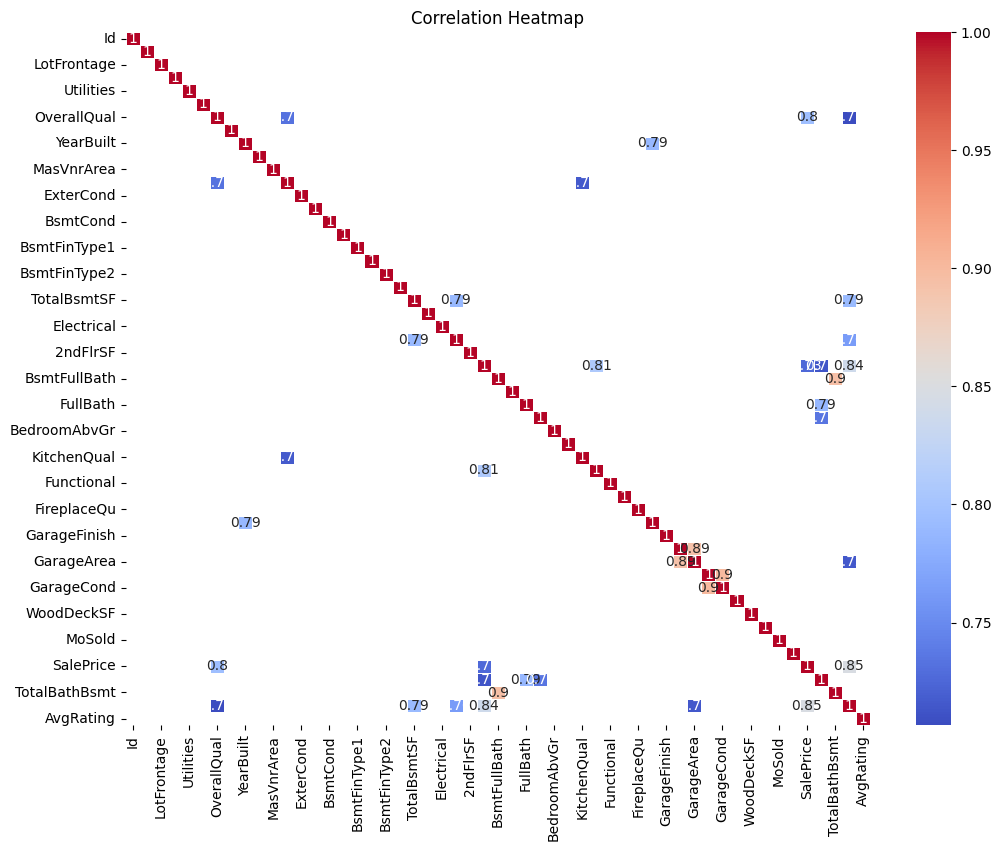

Cặp giá trị tương quan cao:
ExterQual and OverallQual: 0.73
1stFlrSF and TotalBsmtSF: 0.79
KitchenQual and ExterQual: 0.72
TotRmsAbvGrd and GrLivArea: 0.81
FireplaceQu and Fireplaces: -0.73
GarageYrBlt and YearBuilt: 0.79
GarageArea and GarageCars: 0.89
GarageCond and GarageQual: 0.90
SalePrice and OverallQual: 0.80
SalePrice and GrLivArea: 0.73
TotalBathAbvGrd and GrLivArea: 0.71
TotalBathAbvGrd and FullBath: 0.79
TotalBathAbvGrd and HalfBath: 0.73
TotalBathBsmt and BsmtFullBath: 0.90
TotalArea and OverallQual: 0.71
TotalArea and TotalBsmtSF: 0.79
TotalArea and 1stFlrSF: 0.76
TotalArea and GrLivArea: 0.84
TotalArea and GarageArea: 0.72
TotalArea and SalePrice: 0.85


In [5]:
numeric_df = X.select_dtypes(include=['int64', 'float64'])  # chỉ giữ biến số
corr_matrix = numeric_df.corr()

# Vẽ biểu đồ nhiệt độ
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, mask=corr_matrix < 0.7, linewidth=0.5, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.savefig('correlation.png')  # Đặt tên và định dạng file
plt.show()

# In ra các cặp giá trị tương quan cao
high_corr_pairs = []

# Lặp qua ma trận tương quan để tìm các cặp tương quan cao
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.7:  # Thay đổi ngưỡng nếu cần
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# In ra các cặp
print("Cặp giá trị tương quan cao:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

In [6]:
high_corr_col =[
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
    'GarageCars', 'GarageCond',
    'TotRmsAbvGrd', 'FireplaceQu',
    '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF'
]

#['TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea', 'GarageYrBlt']
X = X.drop(columns=[col for col in high_corr_col if col in X.columns])

<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>3. Tính Feature importance sử dụng mô hình</strong></p>
</div>


In [7]:
# Tách lại thành train và test dựa vào ID
train_ids = df1['Id']
train_df = X[X['Id'].isin(train_ids)]
test_df = X[X['Id'].isin(train_ids)]

In [8]:
# Tách features và target
y = train_df['SalePrice']
x = train_df.drop(['Id', 'SalePrice'], axis=1)

# Khởi tạo và huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)

# Lấy độ quan trọng của các đặc trưng
importances_new = model.feature_importances_

# Tạo DataFrame chứa tên và độ quan trọng
feature_importance_new_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances_new
})

# Sắp xếp giảm dần theo Importance
feature_importance_new_df = feature_importance_new_df.sort_values(by='Importance', ascending=True)

In [9]:
feature_importance_new_df.head(15)

,Feature,Importance
89,Condition2_Artery,0.000000e+00
36,MSZoning_None,0.000000e+00
95,Condition2_RRAn,2.048014e-11
119,RoofMatl_Roll,4.456249e-10
142,Exterior2nd_CBlock,4.909775e-09
118,RoofMatl_Metal,5.065491e-09
168,Heating_OthW,8.896756e-09
115,RoofStyle_Shed,1.884003e-08
130,Exterior1st_ImStucc,3.472927e-08
94,Condition2_RRAe,9.394076e-08


<div style="border: 1px solid #b3d7ff; border-radius: 8px; padding: 12px; background: #e6f2ff; color: #000000; font-size: 20px;">
  <p style="margin: 0;"><strong>4. Scale dữ liệu</strong></p>
</div>


In [13]:
id_col = X['Id']
saleprice_col = X['SalePrice']

# Lấy danh sách cột số và loại bỏ Id, SalePrice
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_to_scale = numerical_cols.drop(['Id', 'SalePrice'], errors='ignore')

# Scale
scaler = StandardScaler()
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

# Gắn lại cột Id và SalePrice
X['Id'] = id_col
X['SalePrice'] = saleprice_col

# Đưa 'Id' lên đầu, 'SalePrice' xuống cuối
cols = ['Id'] + [col for col in X.columns if col not in ['Id', 'SalePrice']] + ['SalePrice']
X = X[cols]

# Kiểm tra
print(X.head())

   Id  MSSubClass  LotFrontage   LotArea  Utilities  LandSlope  OverallQual  \
0   1    0.067238    -0.191079 -0.284246   0.018534   0.213851     0.649613   
1   2   -0.874657     0.548779 -0.062333   0.018534   0.213851    -0.061008   
2   3    0.067238    -0.043108  0.256064   0.018534   0.213851     0.649613   
3   4    0.302711    -0.437699 -0.071981   0.018534   0.213851     0.649613   
4   5    0.067238     0.746074  0.836896   0.018534   0.213851     1.360234   

   OverallCond  YearBuilt  YearRemodAdd  ...  SaleCondition_Normal  \
0    -0.506744   1.046009      0.898078  ...                  True   
1     2.187667   0.155073     -0.394444  ...                  True   
2    -0.506744   0.980014      0.850207  ...                  True   
3    -0.506744  -1.857783     -0.681672  ...                 False   
4    -0.506744   0.947016      0.754465  ...                  True   

   SaleCondition_Partial  TotalBathAbvGrd  TotalBathBsmt  TotalArea  \
0                  False         

In [14]:
# Tách lại thành train và test dựa vào ID
train_ids = df1['Id']
train_df = X[X['Id'].isin(train_ids)]
test_df = X[~X['Id'].isin(train_ids)]

In [15]:
train_df.to_csv('Train_Feature_Engineering.csv', index=False)
test_df.to_csv('Test_Feature_Engineering.csv', index=False)